In [ ]:
###########
# imports #
###########

# for folder handling
import os

# for data download
import requests 

# for data unpack
import gzip
import shutil

# for dataframe handling
import pandas as pd

# plotting
import matplotlib.pyplot as plt

In [2]:
#################
# download data #
#################

folder_name = "data"
os.makedirs(folder_name, exist_ok=True) # make dir if not exist

# base url parts
base_url = "https://mobidata-bw.de/fahrradzaehldaten/v2/fahrradzaehler_stundenwerten_"
file_extension = ".csv.gz"

# loop through years and months
for year in range(2013, 2026):  # from 2013 to 2025
    for month in range(1, 13):  # months 01 to 12

        # filename + url
        filename = f"{year}{month:02d}{file_extension}"
        url = base_url + filename
        file_path = os.path.join(folder_name, filename)
        
        # download file
        try:
            print(f"Downloading {url}...")
            response = requests.get(url)
            response.raise_for_status()
            with open(file_path, 'wb') as f:
                f.write(response.content)
            print(f"Saved to {file_path}")
        except Exception as e:
            print(f"Failed to download {url}: {e}")


Saved to data\201301.csv.gz
Saved to data\201302.csv.gz
Saved to data\201303.csv.gz
Saved to data\201304.csv.gz
Saved to data\201305.csv.gz
Saved to data\201306.csv.gz
Saved to data\201307.csv.gz
Saved to data\201308.csv.gz
Saved to data\201309.csv.gz
Saved to data\201310.csv.gz
Saved to data\201311.csv.gz
Saved to data\201312.csv.gz
Saved to data\201401.csv.gz
Saved to data\201402.csv.gz
Saved to data\201403.csv.gz
Saved to data\201404.csv.gz
Saved to data\201405.csv.gz
Saved to data\201406.csv.gz
Saved to data\201407.csv.gz
Saved to data\201408.csv.gz
Saved to data\201409.csv.gz
Saved to data\201410.csv.gz
Saved to data\201411.csv.gz
Saved to data\201412.csv.gz
Saved to data\201501.csv.gz
Saved to data\201502.csv.gz
Saved to data\201503.csv.gz
Saved to data\201504.csv.gz
Saved to data\201505.csv.gz
Saved to data\201506.csv.gz
Saved to data\201507.csv.gz
Saved to data\201508.csv.gz
Saved to data\201509.csv.gz
Saved to data\201510.csv.gz
Saved to data\201511.csv.gz
Saved to data\201512

In [3]:
###############
# unpack data #
###############

# for all .gz files in the folder
for filename in os.listdir(folder_name):
    if filename.endswith(".csv.gz"):
        gz_path = os.path.join(folder_name, filename)
        csv_path = os.path.join(folder_name, filename[:-3])  # remove the .gz extension
        
        # unpack the .gz file
        try:
            print(f"Unpacking {gz_path}...")
            with gzip.open(gz_path, 'rb') as f_in:
                with open(csv_path, 'wb') as f_out:
                    shutil.copyfileobj(f_in, f_out)
            print(f"Unpacked to {csv_path}")
        except Exception as e:
            print(f"Failed to unpack {gz_path}: {e}")

Unpacking data\201301.csv.gz...
Unpacked to data\201301.csv
Unpacking data\201302.csv.gz...
Unpacked to data\201302.csv
Unpacking data\201303.csv.gz...
Unpacked to data\201303.csv
Unpacking data\201304.csv.gz...
Unpacked to data\201304.csv
Unpacking data\201305.csv.gz...
Unpacked to data\201305.csv
Unpacking data\201306.csv.gz...
Unpacked to data\201306.csv
Unpacking data\201307.csv.gz...
Unpacked to data\201307.csv
Unpacking data\201308.csv.gz...
Unpacked to data\201308.csv
Unpacking data\201309.csv.gz...
Unpacked to data\201309.csv
Unpacking data\201310.csv.gz...
Unpacked to data\201310.csv
Unpacking data\201311.csv.gz...
Unpacked to data\201311.csv
Unpacking data\201312.csv.gz...
Unpacked to data\201312.csv
Unpacking data\201401.csv.gz...
Unpacked to data\201401.csv
Unpacking data\201402.csv.gz...
Unpacked to data\201402.csv
Unpacking data\201403.csv.gz...
Unpacked to data\201403.csv
Unpacking data\201404.csv.gz...
Unpacked to data\201404.csv
Unpacking data\201405.csv.gz...
Unpacked

In [ ]:
##########################
# load data to dataframe #
##########################

# pick all .csv files in the folder
all_files = [os.path.join(folder_name, f) for f in os.listdir(folder_name) if f.endswith(".csv")]

# load data from all files 
df_list = []
for file in all_files:
    try:
        print(f"Loading {file}...")
        df = pd.read_csv(
            file,
            encoding='utf-8',        # character encoding e.g. "TÃ¼bingen -> Tübingen"
            low_memory=False,        
            na_values=['na', 'NA', 'null'],  # na values
            parse_dates=['iso_timestamp']    # date column
        )
        df_list.append(df)
    except Exception as e:
        print(f"Failed to load {file}: {e}")

df_loaded = pd.concat(df_list, ignore_index=True)

# convert iso_timestamp to datetime
df_loaded['iso_timestamp'] = pd.to_datetime(df_loaded['iso_timestamp'], utc=True)

print(f"Total rows loaded: {len(df_loaded)}")


Loading data\201301.csv...


Loading data\201302.csv...
Loading data\201303.csv...
Loading data\201304.csv...
Loading data\201305.csv...
Loading data\201306.csv...
Loading data\201307.csv...
Loading data\201308.csv...
Loading data\201309.csv...
Loading data\201310.csv...
Loading data\201311.csv...
Loading data\201312.csv...
Loading data\201401.csv...
Loading data\201402.csv...
Loading data\201403.csv...
Loading data\201404.csv...
Loading data\201405.csv...
Loading data\201406.csv...
Loading data\201407.csv...
Loading data\201408.csv...
Loading data\201409.csv...
Loading data\201410.csv...
Loading data\201411.csv...
Loading data\201412.csv...
Loading data\201501.csv...
Loading data\201502.csv...
Loading data\201503.csv...
Loading data\201504.csv...
Loading data\201505.csv...
Loading data\201506.csv...
Loading data\201507.csv...
Loading data\201508.csv...
Loading data\201509.csv...
Loading data\201510.csv...
Loading data\201511.csv...
Loading data\201512.csv...
Loading data\201601.csv...
Loading data\201602.csv...
L

In [ ]:
###########################
# print dataframe details #
###########################

print(df_loaded.info())
print(df_loaded.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6122719 entries, 0 to 6122718
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   operator_name           object 
 1   domain_name             object 
 2   domain_id               int64  
 3   counter_site            object 
 4   counter_site_id         int64  
 5   counter_serial          object 
 6   longitude               float64
 7   latitude                float64
 8   timezone                object 
 9   iso_timestamp           object 
 10  channels_in             float64
 11  channels_out            float64
 12  channels_unknown        float64
 13  channels_all            int64  
 14  site_temperature        float64
 15  site_rain_accumulation  float64
 16  site_snow_accumulation  float64
dtypes: float64(8), int64(3), object(6)
memory usage: 794.1+ MB
None
      operator_name      domain_name  domain_id      counter_site  \
0  Eco Counter GmbH  Stadt Karlsruhe        75

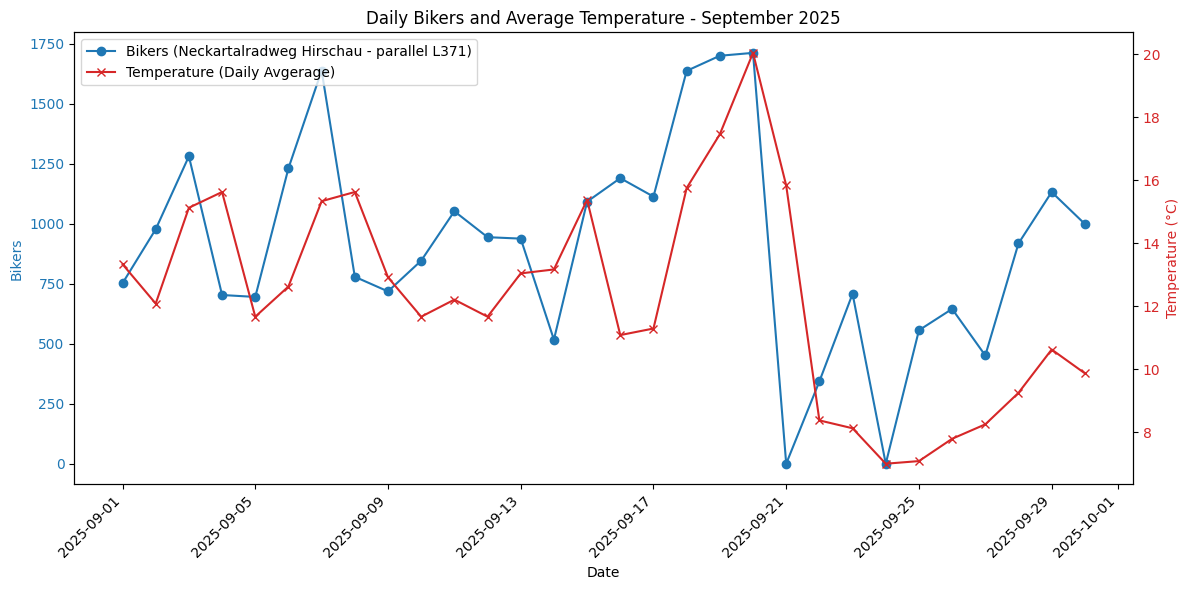

In [ ]:
###############
# sample plot #
###############

# filter for September 2025
sep_2025 = df_loaded[
    (df_loaded['iso_timestamp'].dt.year == 2025) &
    (df_loaded['iso_timestamp'].dt.month == 9)
]

# daily bikers at Neckartalradweg Hirschau - parallel L371
daily_bikers = sep_2025[sep_2025['counter_site'] == 'Neckartalradweg Hirschau - parallel L371'] \
    .groupby(sep_2025['iso_timestamp'].dt.date)['channels_all'].sum()

# daily average temperature at Unter den Linden
daily_temp = sep_2025[sep_2025['counter_site'] == 'Unter den Linden'] \
    .groupby(sep_2025['iso_timestamp'].dt.date)['site_temperature'].mean()

# twin axis plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# bikers axis
ax1.plot(daily_bikers.index, daily_bikers.values, label='Bikers (Neckartalradweg Hirschau - parallel L371)', marker='o', color='tab:blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Bikers', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# temperature axis
ax2 = ax1.twinx()
ax2.plot(daily_temp.index, daily_temp.values, label='Temperature (Daily Avgerage)', marker='x', color='tab:red')
ax2.set_ylabel('Temperature (°C)', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# layout
plt.title('Daily Bikers and Average Temperature - September 2025')
fig.autofmt_xdate(rotation=45)
fig.tight_layout()

# combined legends
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.show()
